In [78]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk

from textblob import TextBlob

%matplotlib inline
import re
from nltk.corpus import stopwords

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
# df = pd.read_csv('train.csv')
df = pd.read_csv('trainMaster.csv')

In [3]:
df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_level,clean,length,word_count,polarity,subjectivity
0,0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,0,1,264,43,0.136364,0.454545
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1,112,18,0.287500,0.550000
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1,233,42,0.160000,0.406667
3,3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0,0,1,622,116,0.200000,0.301042
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1,67,13,0.000000,0.000000


In [37]:
x_train = df['comment_text']
y_train = df.iloc[:, 2:9]

In [41]:
y_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Feature Engineering

In [5]:
# def preprocess(ReviewText):
#     ReviewText = ReviewText.str.replace("(<br/>)", "")
#     ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
#     ReviewText = ReviewText.str.replace('(&amp)', '')
#     ReviewText = ReviewText.str.replace('(&gt)', '')
#     ReviewText = ReviewText.str.replace('(&lt)', '')
#     ReviewText = ReviewText.str.replace('(\xa0)', ' ')
#     ReviewText = ReviewText.str.replace('(\n)', ' ') 
#     ReviewText = ReviewText.str.replace('==', ' ') 
#     return ReviewText
# df['comment_text'] = preprocess(df['comment_text'])

In [6]:
# df['toxic_level'] = df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum(axis=1)
# df['clean'] = df[['toxic_level']].apply(lambda x: 1 if x.toxic_level==0 else 0, axis=1)
# df['length'] = df['comment_text'].apply(len)
# df['word_count'] = df['comment_text'].apply(lambda x: len(x.split(' ')))
# df['polarity'] = df['comment_text'].map(lambda text: TextBlob(text).sentiment.polarity)
# df['subjectivity'] = df['comment_text'].map(lambda text: TextBlob(text).sentiment.subjectivity)

# Unigram Bigram Trigram

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

### Top unigrams before removing stop words

In [8]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['comment_text'], 20)

dfUni00 = pd.DataFrame(common_words, columns = ['comment_text' , 'count'])

### Top unigrams after removing stop words

In [9]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['comment_text'], 20)

dfUni01 = pd.DataFrame(common_words, columns = ['comment_text' , 'count'])

### Top bigrams before removing stop words

In [10]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['comment_text'], 20)

dfBi00 = pd.DataFrame(common_words, columns = ['comment_text' , 'count'])

### Top bigrams after removing stop words

In [11]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['comment_text'], 20)

dfBi01 = pd.DataFrame(common_words, columns = ['comment_text' , 'count'])

In [77]:
dfBi01

,comment_text,count
0,talk page,13430
1,speedy deletion,4404
2,http www,3217
3,fair use,3174
4,fuck fuck,2959
5,don know,2895
6,feel free,2357
7,blocked editing,2342
8,talk contribs,2265
9,talk pages,2168


### Top trigrams before removing stop words

In [12]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['comment_text'], 20)

dfTri00 = pd.DataFrame(common_words, columns = ['comment_text' , 'count'])

### Top trigrams after removing stop words

In [13]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['comment_text'], 20)

dfTri01 = pd.DataFrame(common_words, columns = ['comment_text' , 'count'])

# Processing Data

In [14]:
stop = []
for words in stopwords.words('english'):
    s = [char for char in words if char not in string.punctuation]
    stop.append(''.join(s))
def process_normal(text):
    return [word for word in text.split() if word.lower() not in stop]

def process_nocase(text):
    return [word.lower() for word in text.split() if word.lower() not in stop]

def process_nopunc(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stop]

def process_nocasepunc(text):
    nocasepunc = [char for char in text if char not in string.punctuation]
    nocasepunc = ''.join(nocasepunc)
    return [word.lower() for word in nocasepunc.split() if word.lower() not in stop]

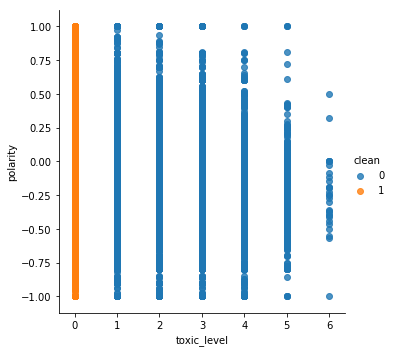

In [15]:
sns.lmplot(x='toxic_level', y='polarity', hue='clean', data=df, fit_reg=False)

# Class Distribution

In [16]:
listItem = []

for col in df[['toxic','severe_toxic','obscene','threat','insult','identity_hate','clean']]:
    listItem.append([col,
                    df[col].sum()
                     ])

dfDist = pd.DataFrame(columns=['kind', 'count'],
                     data=listItem)
dfDist

,kind,count
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405
6,clean,143346


In [34]:
bars = go.Bar(
        x=dfDist['kind'],
        y=dfDist['count'],
    )

layout = go.Layout(
    title="Class distribution"
)

fig = go.Figure(data=[bars], layout=layout)
iplot(fig, filename='bar')

# Most Common Word

In [66]:
from collections import Counter

In [50]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [75]:
def most_common_words(category, number=15):
    word_counts={}
    word_counts[category] = Counter()
    text = df[df[category]==1]['comment_text'].apply(process_nocase)
    
    for item in text:
        word_counts[category].update(item)
    
    words, counts = zip(*word_counts[category].most_common(number)[::-1])
    bars = go.Bar(
        y=words,
        x=counts,
        orientation="h"
    )

    layout = go.Layout(
        title="Most common words of the class \"{}\"".format(category),
        yaxis=dict(
            ticklen=8
        )
    )

    fig = go.Figure(data=[bars], layout=layout)
    iplot(fig, filename='bar')

In [92]:
aw = df[df['toxic']==1]['comment_text'].apply(process_nocase)

In [96]:
bob2 = []
bob2.append(' '.join([aw[0], aw[1]]))

AttributeError: 'tuple' object has no attribute 'join'

In [88]:
def most_common_words_bigram(category, number=15):
    word_counts={}
    bigram = []
    bigram_join = []

    word_counts[category] = Counter()
    text = df[df[category]==1]['comment_text'].apply(process_nocase)
    text.apply(lambda x: bigram.extend(nltk.bigrams(x)))
    
    for item in bigram:
        word_counts[category].update(item)
    
    words, counts = zip(*word_counts[category].most_common(number)[::-1])
    bars = go.Bar(
        y=words,
        x=counts,
        orientation="h"
    )

    layout = go.Layout(
        title="Most common bigram words of the class \"{}\"".format(category),
        yaxis=dict(
            ticklen=8
        )
    )

    fig = go.Figure(data=[bars], layout=layout)
    iplot(fig, filename='bar')

In [89]:
most_common_words_bigram('toxic')

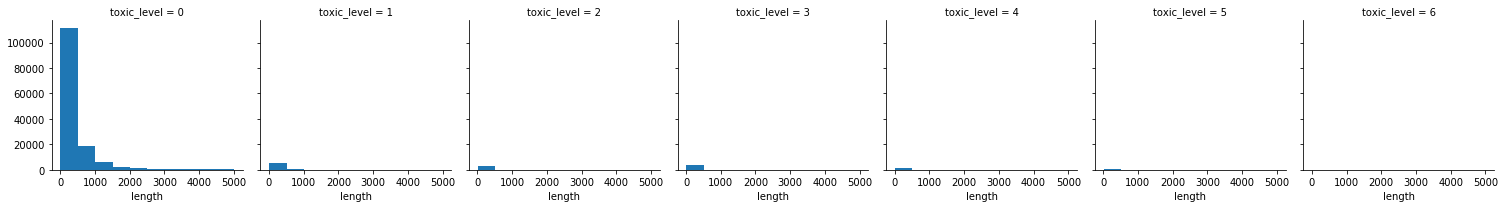

In [19]:
g = sns.FacetGrid(df, col="toxic_level")
g = g.map(plt.hist, "length", bins=10)

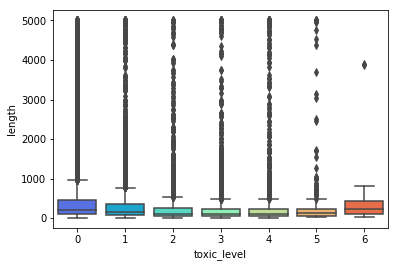

In [20]:
sns.boxplot('toxic_level','length',data=df, palette='rainbow')

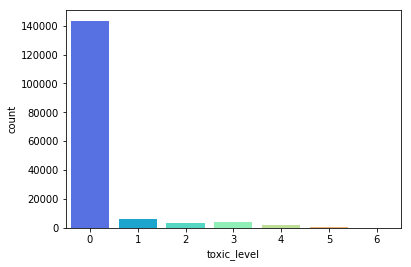

In [21]:
sns.countplot('toxic_level',data=df, palette='rainbow')

In [22]:
# df.sort_values('length', ascending = False)

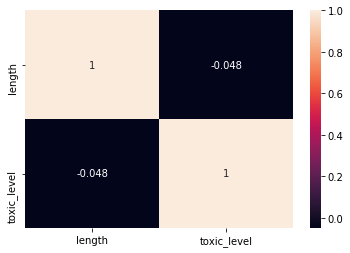

In [23]:
sns.heatmap(pd.concat([df['length'],df['toxic_level']], axis=1).corr(), annot=True)

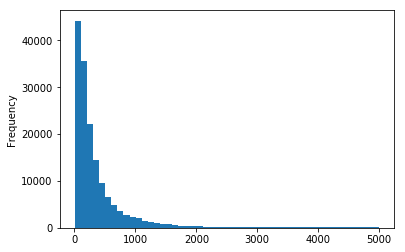

In [24]:
df['length'].plot(bins=50, kind='hist') 

In [25]:
df[(df['length'] == 910) & (df['toxic_level']!=0)]['comment_text'].iloc[0]

"I was there the night at the 100 club when Sid invented pogoing and he really did invent it - as he pogoed and came down he was smashing people with his elbows - we were off to the side but this caused the crowd to keep pushing into us - which made my cousin keep spilling his drink (incidentally he was the guy in the Melody Maker photo throwing the punch at the Nashville pistols gig) - this happened about three times and then my cousin exploded and hit Sid - the crowd parted and my cousin,his mate and me (hiding behind) had an empty bottle in his hand saying right 'who's first' to all the punks who were thinking of having a go - well nothing happened and the crowd closed up cause my cousins mad when he's had a few lagers- its the Irish in us - fracas over and next Sid Vicious comes up to us in the crowd and says to my cousin 'Hey do you wanna join my band?' to which my cousin told him to f*ck off."

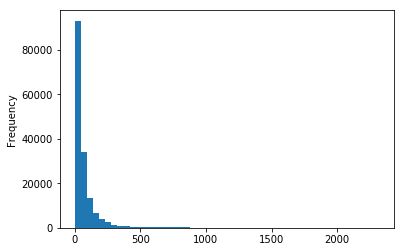

In [26]:
df['word_count'].plot(bins=50, kind='hist') 

In [27]:
df[(df['comment_text'].str.contains('noob')) & (df['clean']==1)]['comment_text'].iloc[1]

'dont give fake warning to users. you may not bite the noobies. thank you.'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFB4074EF0>,
      dtype=object)

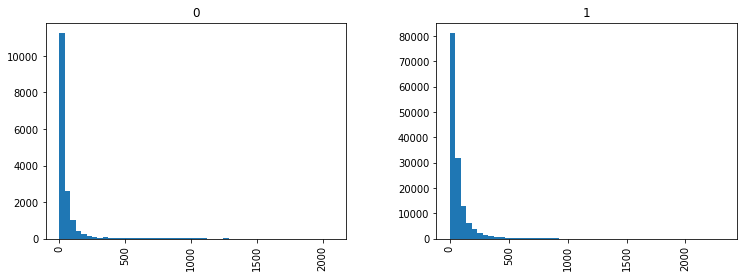

In [28]:
df.hist(column='word_count', by='clean', bins=50, figsize=(12,4))

In [29]:
df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_level,clean,length,word_count,polarity,subjectivity
0,0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,0,1,264,43,0.136364,0.454545
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1,112,18,0.287500,0.550000
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1,233,42,0.160000,0.406667
3,3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0,0,1,622,116,0.200000,0.301042
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1,67,13,0.000000,0.000000


# Target 

# New CSV

In [30]:
# trainMaster = df.copy()
# trainMaster.to_csv('trainMaster.csv')

In [31]:
# trainNoStop = df.copy()
# trainNoStop['comment_text'] = trainNoStop['comment_text'].apply(process_nostop)
# trainNoStop.to_csv('trainNoStop.csv')

In [32]:
# trainNoPunc = df.copy()
# trainNoPunc['comment_text'] = trainNoPunc['comment_text'].apply(process_nopunc)
# trainNoPunc.to_csv('trainNoPunc.csv')

In [33]:
# trainNoCasePunc = df.copy()
# trainNoCasePunc['comment_text'] = trainNoCasePunc['comment_text'].apply(process_nocasepunc)
# trainNoCasePunc.to_csv('trainNoCasePunc.csv')